### Import cytview, pandas and matplotlib


In [31]:
import cytview as cv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Read your experimental results into a pandas dataframe

In [2]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurement_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurements of interest

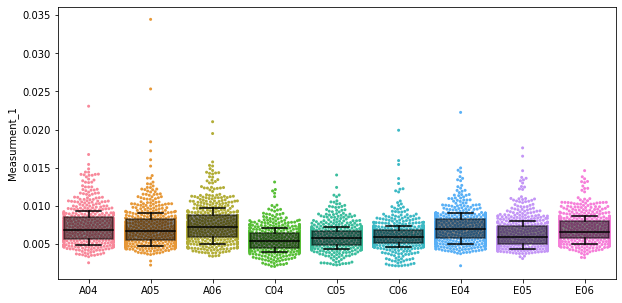

In [34]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])

plot = cv.cell_plot(df, measurement= "Measurement_1", identifier= "Metadata_Well")
plt.ylabel("Measurment_1")
plt.show()

In [12]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
153,0.011991,0.013973,0.009462,0.004804,0.006332,0.005076,0.010088,0.004935,0.010292
2971,0.007068,0.004838,0.004984,0.006019,0.006098,0.010368,0.008663,0.004435,0.005811
4920,0.004612,0.006467,0.007814,0.003268,0.004896,0.004027,0.004783,0.005950,0.005390
4061,0.005201,0.008176,0.008544,0.006457,0.007795,0.008507,0.008613,0.004516,0.004706
3726,0.005421,0.006963,0.008824,0.004547,0.004245,0.005708,0.003831,0.004666,0.005260
...,...,...,...,...,...,...,...,...,...
2811,0.005134,0.006553,0.006575,0.004634,0.009026,0.005614,0.010384,0.003977,0.004823
4792,0.006266,0.006299,0.009526,0.007063,0.003918,0.004498,0.003765,0.005838,0.003851
1600,0.004375,0.006623,0.009643,0.004907,0.005983,0.004624,0.007644,0.005945,0.004871
4170,0.010007,0.005252,0.006753,0.006130,0.006829,0.005266,0.004826,0.006933,0.009013


In [13]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.007378,0.007197,0.007517,0.005593,0.005840,0.006064,0.007015,0.006358,0.006815
std,0.002992,0.002564,0.002583,0.001637,0.001828,0.001609,0.002227,0.001930,0.001920
min,0.002205,0.002529,0.002406,0.002077,0.002226,0.002089,0.002152,0.003462,0.002656
25%,0.005461,0.005410,0.005866,0.004618,0.004823,0.005107,0.005575,0.005008,0.005410
50%,0.007043,0.006623,0.007107,0.005432,0.005554,0.006021,0.006650,0.005942,0.006464
75%,0.008564,0.008614,0.008736,0.006387,0.006483,0.006914,0.007977,0.007211,0.007846
max,0.048536,0.028289,0.027346,0.012332,0.017371,0.011828,0.028025,0.016492,0.015311


### Analyse replicate data and perform statistical analysis

Sample 1 vs Sample 2 : p value:  0.004145  ( ** )
Sample 2 vs Sample 3 : p value:  0.012668  ( * )


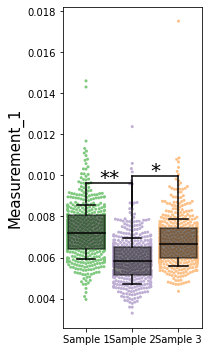

In [18]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Choose which groups to compare by their indexes, this will perform a one-way ANOVA
between the means of Sample 1 vs Sample 2 as well as Sample 2 vs Sample 3.
"""
compare = [[0,1],[1,2]]

"""
Plot the data and specify the groupings, labels and comparisons with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, compare=compare, draw=True)
plt.tight_layout()
plt.show()

### View the dataframe generated from replicates and output the summary data

In [19]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"]

,Sample 1,Sample 2,Sample 3
4211,0.006576,0.006815,0.007960
4110,0.005408,0.006592,0.007256
1083,0.006685,0.003818,0.006793
1971,0.007712,0.005640,0.005901
1102,0.008460,0.003951,0.007491
...,...,...,...
4152,0.008417,0.004783,0.006078
4286,0.006931,0.005336,0.006348
2218,0.009037,0.006175,0.007092
3353,0.007506,0.006348,0.007218


In [16]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,Sample 1,Sample 2,Sample 3
count,500.000000,500.000000,500.000000
mean,0.007241,0.005932,0.006867
std,0.001327,0.001084,0.001328
min,0.003950,0.003422,0.004081
25%,0.006334,0.005165,0.006045
50%,0.007111,0.005843,0.006657
75%,0.008040,0.006559,0.007577
max,0.014941,0.011354,0.017510


In [17]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()




,A04,A05,A06,C04,C05,C06,E04,E05,E06
2679,0.005040,0.007075,0.003628,0.004700,0.007080,0.003619,0.004479,0.004513,0.004094
584,0.004475,0.007265,0.010818,0.005370,0.005859,0.006836,0.008317,0.008055,0.005804
3067,0.004600,0.005538,0.009472,0.006305,0.002710,0.005727,0.009572,0.005855,0.006186
2050,0.007892,0.007531,0.007491,0.006190,0.008693,0.006898,0.008657,0.006429,0.005677
3969,0.007945,0.010951,0.008506,0.004081,0.005519,0.005320,0.008491,0.006339,0.007784
